# Loading the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# reading csv data
data = pd.read_csv("./data/fashion-mnist_train.csv")
images = data.iloc[:,1:]
labels = data.iloc[:,0]

print(data.shape)
print(data.head(5))

label_map = {0: 'T-shirt', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle'}

# function that turns number to string labels
def label_str(label):
    return label_map[label]



(60000, 785)
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      2       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      6       0       0       0       0       0       0       0       5   
3      0       0       0       0       1       2       0       0       0   
4      3       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0        30        43         0   
3       0  ...         3         0         0         0         0         1   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0      

# Visualising the data
Page 1 in the project report

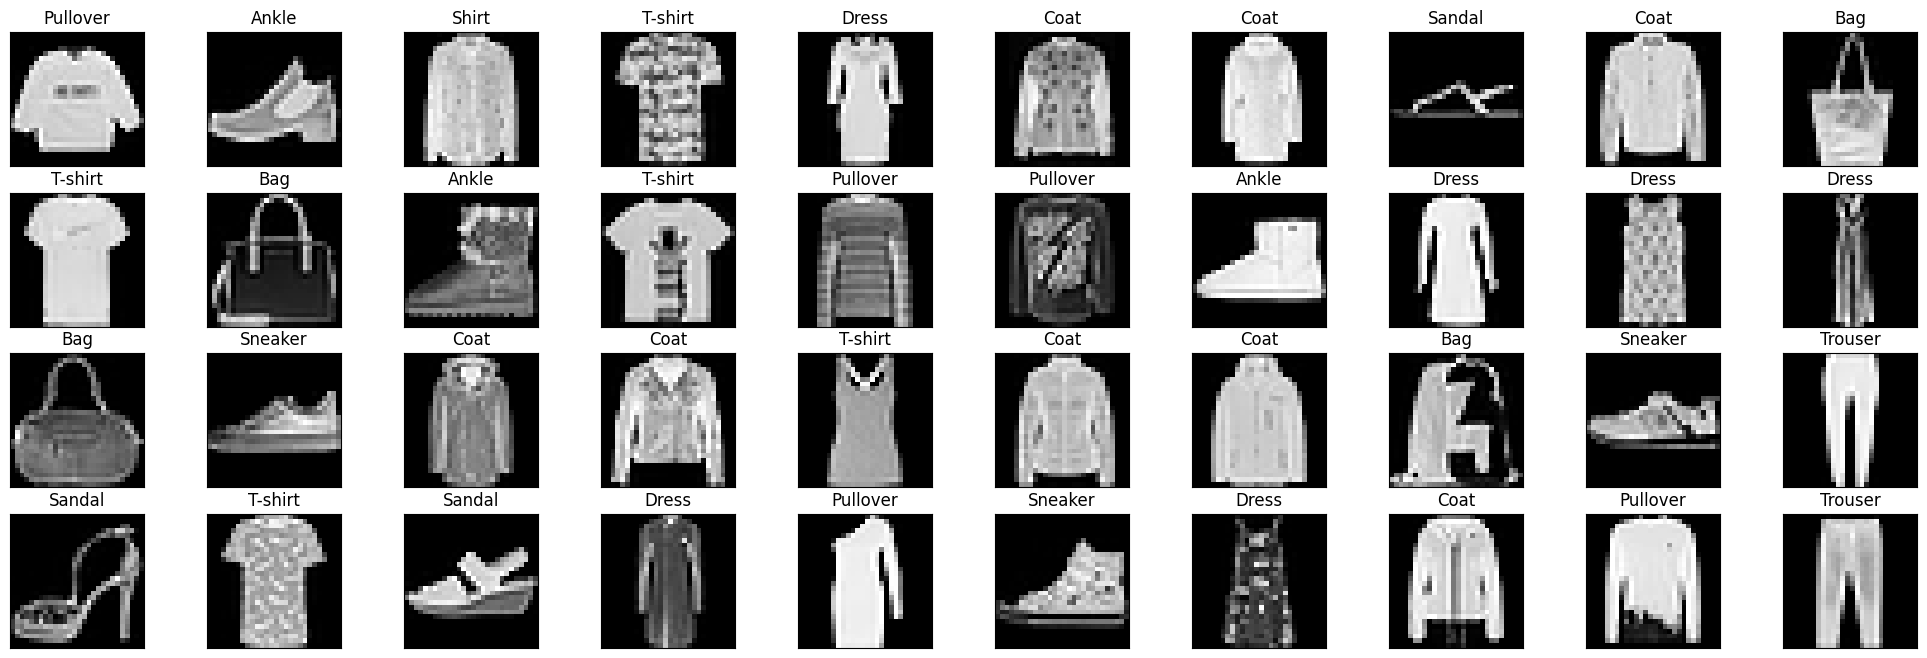

In [3]:
IMG_ROWS, IMG_COLS = 28, 28
fig = plt.figure(figsize=(25, 8))

# displaying first 40 items
for idx in range(0,40):
    ax = fig.add_subplot(4, int(40/4), idx+1, xticks=[], yticks=[])
    ax.imshow(np.array(images.iloc[idx, :]).reshape(IMG_ROWS, IMG_COLS), cmap='gray')
    ax.set_title(label_str(labels[idx]))


Number of all items: 60000
Number of items labeled as T-shirt: 6000
Number of items labeled as Trouser: 6000
Number of items labeled as Pullover: 6000
Number of items labeled as Dress: 6000
Number of items labeled as Coat: 6000
Number of items labeled as Sandal: 6000
Number of items labeled as Shirt: 6000
Number of items labeled as Sneaker: 6000
Number of items labeled as Bag: 6000
Number of items labeled as Ankle: 6000


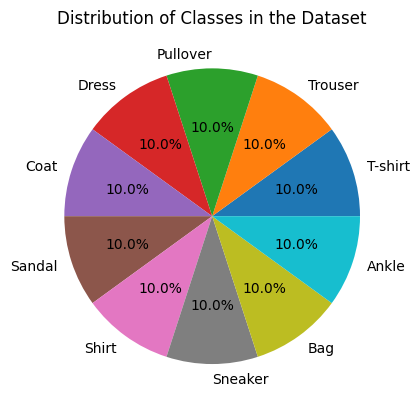

In [4]:
# counting items of each class

print("Number of all items:", len(labels))
sizes=[]
pieLabels=[x for x in label_map.values()]
for i in range(0,10):
    num=len(labels[labels==i])
    print("Number of items labeled as " + label_map[i] +": "+ str(num))
    sizes.append(num)


# plotting a pie chart visualizing class distribution in the dataset
fig, ax = plt.subplots()
ax.pie(sizes, labels=pieLabels, autopct='%1.1f%%')
ax.set_title("Distribution of Classes in the Dataset");

# Scaling and normalising the data

In [5]:
from sklearn.preprocessing import StandardScaler, normalize
scaler = StandardScaler()
images_scaled = pd.DataFrame(scaler.fit_transform(images))
images_norm = normalize(images_scaled)

# Dimensionality reduction
Page 3 in the project report

PCA dimensionality reduction

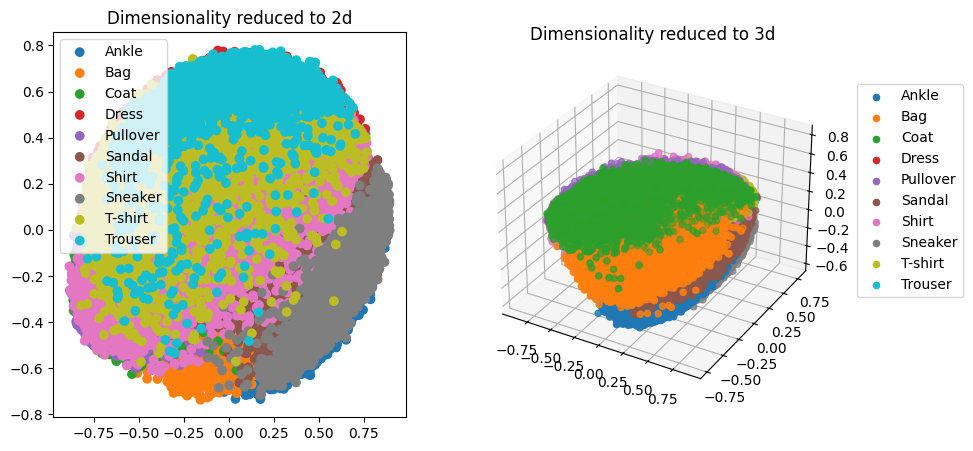

In [18]:
from sklearn.decomposition import PCA

# initializing the model
pca = PCA(n_components = 784)

# fitting the model and transforming
data_pca=pca.fit_transform(images_norm)

data_pca=pd.DataFrame(data_pca, columns=["PC{}".format(n) for n in range(1,785)])
data_pca["type"] = labels.map(label_map)
# print(data_pca.head(5))

# plotting the dataset in a reduced-dimensionality space
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10,5))
axs[1].remove()
ax2 = fig.add_subplot(1, 2, 2, projection='3d')

groups = data_pca.groupby("type")

for name, group in groups:
    # 2-d space
    axs[0].scatter(group["PC1"], group["PC2"], marker="o", linestyle="", label=name)
    # 3-d space
    ax2.scatter(group["PC1"], group["PC2"], group["PC3"], marker="o", label=name)
    
axs[0].legend()
axs[0].set_title("Dimensionality reduced to 2d")

ax2.legend(bbox_to_anchor=(1.08, 0.9), loc='upper left', borderaxespad=0)
ax2.set_title("Dimensionality reduced to 3d");


Plotting the Scree Plot and determining number of most important dimensions

Number of important dimensions: 257


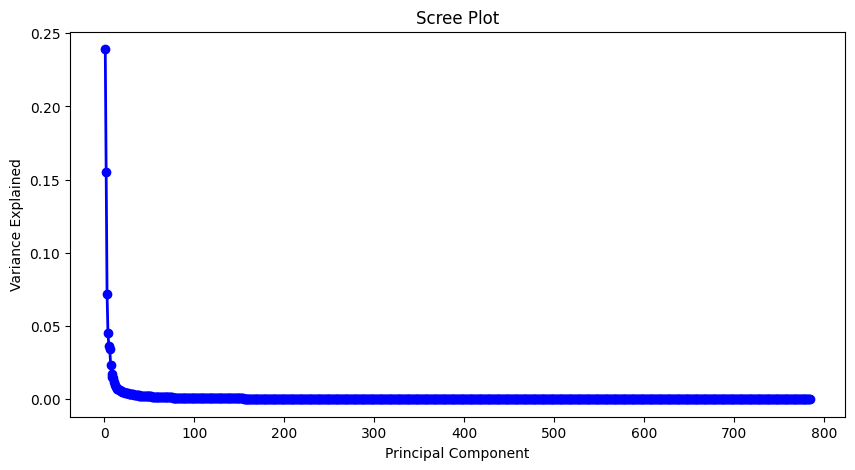

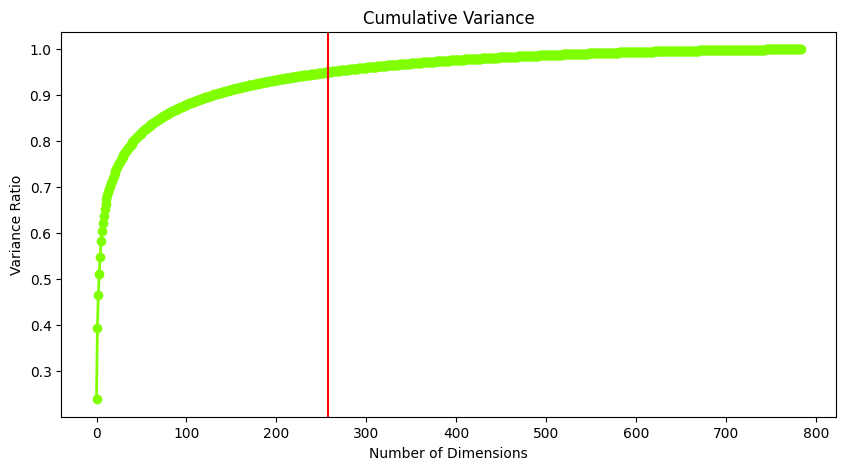

In [15]:
PC_values = np.arange(pca.n_components_) + 1

# principal component to variance explained plot
fig, ax1 = plt.subplots(figsize=(10,5))
ax1.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')

ax1.set_title('Scree Plot')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Variance Explained')

# computing cumulative sum of explained variance
cum_sum = np.cumsum(pca.explained_variance_ratio_)

# determining the cut-off
pca_dims = np.argmax(cum_sum >= 0.95) + 1
print("Number of important dimensions: " + str(pca_dims))

# creating the number of principal components to cumulative sum plot with the cut-off line
fig, ax2 = plt.subplots(figsize=(10,5))
ax2.plot(cum_sum, 'o-', linewidth=2, color='chartreuse')
ax2.axvline(x=pca_dims, color='r')

ax2.set_title('Cumulative Variance')
ax2.set_xlabel('Number of Dimensions')
ax2.set_ylabel('Variance Ratio');

t-SNE dimensionality reduction

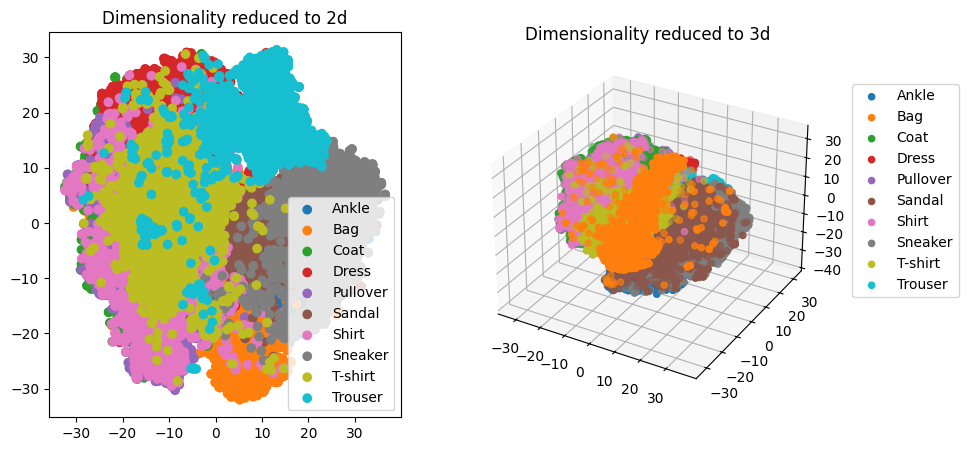

In [19]:
from sklearn.manifold import TSNE

# initializing and fitting the model
data_tsne = TSNE(n_components=3).fit_transform(images_norm)

data_tsne = pd.DataFrame(data_tsne, columns=['T1','T2','T3'])
data_tsne["type"] = labels.map(label_map)

# plotting the dataset in reduced-dimensionality space
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(10,5))
axs[1].remove()
ax2 = fig.add_subplot(1, 2, 2, projection='3d')
groups = data_tsne.groupby("type")

for name, group in groups:
    # 2-d space
    axs[0].scatter(group["T1"], group["T2"], marker="o", linestyle="", label=name)
    # 3-d space
    ax2.scatter(group["T1"], group["T2"], group["T3"], marker="o", linestyle="", label=name)
    
    
axs[0].legend()
axs[0].set_title("Dimensionality reduced to 2d")
    
ax2.legend(bbox_to_anchor=(1.08, 0.9), loc='upper left', borderaxespad=0)
ax2.set_title("Dimensionality reduced to 3d");